In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('aspect_sentiment.csv')
df.shape, df.columns

((3696, 3), Index(['sentence', 'aspect', 'sentiment'], dtype='object'))

In [3]:
df['sentiment'].value_counts()

sentiment
Negative                                         2177
Positive                                         1272
Neutral                                           233
{"choices":["Positive","Negative"]}                 6
{"choices":["Positive","Neutral"]}                  6
{"choices":["Negative","Neutral"]}                  1
{"choices":["Positive","Negative","Neutral"]}       1
Name: count, dtype: int64

In [4]:
valid_sentiments = ['Positive', 'Negative']
# , 'Neutral'
df = df[df['sentiment'].isin(valid_sentiments)]

<Axes: ylabel='count'>

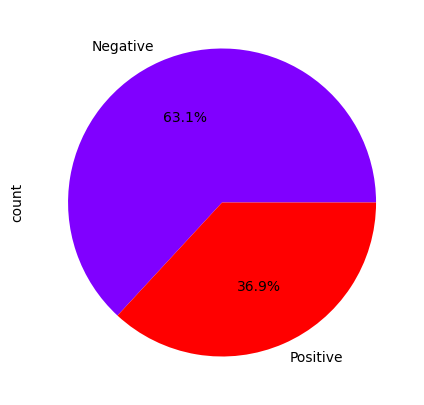

In [5]:
df['sentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(5, 5), colormap='rainbow')

In [6]:
df['sentiment'] = df['sentiment'].map({'Positive': 1, 'Negative': 0})

In [7]:
df['pair'] = df['sentence'] + ' [ASP] ' + df['aspect']
pd.set_option('display.max_colwidth', None)  
pd.set_option('display.width', None) 
df.head()

,sentence,aspect,sentiment,pair
0,i have been to this place for random dinner with friends and it was the most stupid decision,other,0,i have been to this place for random dinner with friends and it was the most stupid decision [ASP] other
1,the place is the perfect example of mismanagement,service,0,the place is the perfect example of mismanagement [ASP] service
2,the food was also pathetic,quality,0,the food was also pathetic [ASP] quality
3,we have ordered sambhar rice after a lot of disappointment thinking that atleast it will come on time and will be good in taste but i guess they were checking our patience and it took almost mins for us to get that,quality,0,we have ordered sambhar rice after a lot of disappointment thinking that atleast it will come on time and will be good in taste but i guess they were checking our patience and it took almost mins for us to get that [ASP] quality
4,we have ordered sambhar rice after a lot of disappointment thinking that atleast it will come on time and will be good in taste but i guess they were checking our patience and it took almost mins for us to get that,service,0,we have ordered sambhar rice after a lot of disappointment thinking that atleast it will come on time and will be good in taste but i guess they were checking our patience and it took almost mins for us to get that [ASP] service


In [8]:
df.drop(columns=['sentence', 'aspect'], inplace=True)

# ML

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(df['pair'], df['sentiment'], test_size=0.2, random_state=42)

In [43]:
def evaluate_model(y_test, y_pred):
    labels = [1, 0]
    print(classification_report(y_test, y_pred, labels=labels))
    cm = confusion_matrix(y_test, y_pred, labels=labels)
    print(f"          Pred_Pos   Pred_Neg")
    print(f"True_Pos     {cm[0][0]:>5}      {cm[0][1]:>5}")
    print(f"True_Neg     {cm[1][0]:>5}      {cm[1][1]:>5}")
    # 'Neutral', 
    # cm = confusion_matrix(y_test, y_pred, labels=labels)
    # print("Confusion Matrix:")
    # print(f"True\\Pred:  Positive   Neutral   Negative")
    # print(f"Positive     {cm[0][0]:>5}      {cm[0][1]:>5}      {cm[0][2]:>5}")
    # print(f"Neutral      {cm[1][0]:>5}      {cm[1][1]:>5}      {cm[1][2]:>5}")
    # print(f"Negative     {cm[2][0]:>5}      {cm[2][1]:>5}      {cm[2][2]:>5}")

In [44]:
!pip install xgboost

You should consider upgrading via the 'C:\Users\Admin\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
# from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier 

In [46]:
def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    evaluate_model(y_test, y_pred)
    return model.score(X_test, y_test)

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Linear SVC': LinearSVC(random_state=42),
    # 'Multinomial Naive Bayes': MultinomialNB(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(eval_metric='mlogloss', random_state=42)
}

## TF-IDF
TF-IDF biến văn bản thành vector số dựa trên độ quan trọng của các từ trong văn bản, so với toàn bộ tập dữ liệu.

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

In [ ]:
stopwords_list = set(stopwords.words("english"))
print(f'List of stopwords: {len(stopwords_list)}\n{stopwords_list}\n')

# We remove negation words in list of stopwords
no_stopwords = ["not", "nor", "don't",'aren','don','zain',"aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't",
               'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't",
               "won't", 'wouldn', "wouldn't"]
stopwords_list -= set(no_stopwords)
    
print(f'Final list of stopwords: {len(stopwords_list)}\n{stopwords_list}')

List of stopwords: 198
{'wasn', 'y', 'very', 'shouldn', "that'll", 'a', 'did', "it'll", 'herself', 'both', 'of', 'that', 'from', 'too', "he'll", "we're", 'can', "you've", 'aren', 'itself', 'just', 'hadn', 'than', "she's", "hasn't", 'most', 'hasn', 'on', "won't", 'mustn', 'yourself', 'other', "mustn't", 'over', "they're", "you'd", "you'll", 'and', 'as', 'here', 'again', 're', 'no', 's', 'any', 'hers', 'll', "needn't", 'were', 'but', 'had', "they'll", "we'll", 'who', 'ain', 'we', "i'll", "he'd", "we've", 'once', 'm', 'when', 'was', 'before', 'ma', 'yourselves', 'not', 'your', 'doesn', 'through', 'this', "she'd", "wouldn't", "we'd", 'whom', 'more', "they've", 'her', 'then', "i've", 'off', 'against', "i'm", 'into', "should've", 'or', 'won', 'weren', 'at', 'be', 'all', 'its', 'what', 'o', 'yours', 'down', "wasn't", 'i', 'isn', 'my', 'ourselves', 'you', 'nor', 'am', 'own', 'she', 'been', 'until', 'wouldn', 'me', 'below', 'it', 'some', 'further', "haven't", 'have', 'doing', 'should', 'needn',

In [ ]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemma_stem_text(words_list):
    text = [lemmatizer.lemmatize(token.lower()) for token in words_list]# eighties->eight or messages->message or drugs->drug
    text = [lemmatizer.lemmatize(token.lower(), "v") for token in text]# going-> go or started->start or watching->watch
    return text

import re
re_negation = re.compile("n't ")

# function that receive a sequence of woords and return the same sequence transforming
# abbreviated negations to the standard form.
def negation_abbreviated_to_standard(sent):
    sent = re_negation.sub(" not ", sent)
    return sent

word_example = "I aren't "
print(f'The sentence "{word_example}" is transformed to "{negation_abbreviated_to_standard(word_example)}"')

# Import function BeautifulSoup to clean text of HTML tags
from bs4 import BeautifulSoup 

def review_to_words(raw_review):
    # 1. Remove HTML tags
    review_text = BeautifulSoup(raw_review).get_text() 
    
    # 2. Transform abbreviated negations to the standard form.
    review_text = negation_abbreviated_to_standard(review_text)
    
    # 3. Remove non-letters and non-numbers   
    letters_numbers_only = re.sub("[^a-zA-Z_0-9]", " ", review_text) 
    
    # 4. Convert to lower case and split into individual words (tokenization)
    words = np.char.lower(letters_numbers_only.split())                             
    
    # 5. Remove stop words
    meaningful_words = [w for w in words if not w in stopwords_list]
    # 6. Apply lemmatization function
    lemma_words = lemma_stem_text(meaningful_words)
    
    # 7. Join the words back into one string separated by space, and return the result.
    return( " ".join(lemma_words))

In [ ]:
def full_preprocessing(sentence):
    sentence = negation_abbreviated_to_standard(sentence)
    sentence = sentence.lower()
    sentence = re.sub(r'[^a-z\s]', '', sentence)  # remove punctuation
    tokens = word_tokenize(sentence)
    tokens = [t for t in tokens if t not in stopwords_list]
    tokens = [lemmatizer.lemmatize(t, 'v') for t in tokens]
    return ' '.join(tokens)

In [49]:
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2), stop_words=stopwords_list)
tfidf = TfidfVectorizer(ngram_range=(1, 2), max_features=5000)
X_train_vec = tfidf.fit_transform(X_train)
X_test_vec = tfidf.transform(X_test)

In [67]:
print(X_train_vec)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 59663 stored elements and shape (2759, 5000)>
  Coords	Values
  (0, 748)	0.3031556502260262
  (0, 4589)	0.09239708332726698
  (0, 3806)	0.21947716130358047
  (0, 3982)	0.0695557529077918
  (0, 2665)	0.212662556232165
  (0, 4720)	0.14004652941803386
  (0, 2192)	0.16576738366899604
  (0, 385)	0.22422719393859988
  (0, 1887)	0.11765917657193184
  (0, 1287)	0.22257828913832314
  (0, 169)	0.07723380387954898
  (0, 3173)	0.2463320501208727
  (0, 3070)	0.22594940701982177
  (0, 2733)	0.10539954022613643
  (0, 415)	0.03874341492033195
  (0, 3199)	0.0669989928580543
  (0, 766)	0.2296420488621122
  (0, 4113)	0.2605789638537557
  (0, 2670)	0.2919971696920594
  (0, 4727)	0.2919971696920594
  (0, 3071)	0.2564969376794044
  (0, 2740)	0.252804295837114
  (0, 750)	0.2833518264966966
  (0, 419)	0.06800154202890574
  (1, 415)	0.06026775609101705
  :	:
  (2757, 3837)	0.27348031009227436
  (2757, 3001)	0.3909274696395707
  (2757, 3055)	0.372942

In [50]:
tfidf_acc = {}
for model_name, model in models.items():
    print(model_name)
    accuracy = train_and_evaluate(model, X_train_vec, y_train, X_test_vec, y_test)
    tfidf_acc[model_name] = accuracy

Logistic Regression
              precision    recall  f1-score   support

           1       0.91      0.68      0.78       250
           0       0.84      0.96      0.90       440

    accuracy                           0.86       690
   macro avg       0.88      0.82      0.84       690
weighted avg       0.87      0.86      0.85       690

          Pred_Pos   Pred_Neg
True_Pos       169         81
True_Neg        16        424
Linear SVC
              precision    recall  f1-score   support

           1       0.82      0.77      0.80       250
           0       0.87      0.91      0.89       440

    accuracy                           0.86       690
   macro avg       0.85      0.84      0.84       690
weighted avg       0.86      0.86      0.86       690

          Pred_Pos   Pred_Neg
True_Pos       192         58
True_Neg        41        399
Random Forest
              precision    recall  f1-score   support

           1       0.88      0.64      0.74       250
           0

In [51]:
results_df = pd.DataFrame.from_dict(tfidf_acc, orient='index', columns=['Accuracy'])
results_df = results_df.sort_values(by='Accuracy', ascending=False)
print("\nTF-IDF Results:")
print(results_df)


TF-IDF Results:
                     Accuracy
Logistic Regression  0.859420
Linear SVC           0.856522
XGBoost              0.852174
Random Forest        0.836232


## USE

In [52]:
import tensorflow_hub as hub
import tensorflow as tf
tf.get_logger().setLevel('ERROR')

In [53]:
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

X_train_embed = embed(X_train.tolist())
X_test_embed = embed(X_test.tolist())

X_train_embed = np.array(X_train_embed)
X_test_embed = np.array(X_test_embed)

In [68]:
X_train_embed

array([[-0.03538578,  0.00533207,  0.06017281, ..., -0.01660433,
        -0.03752   , -0.07439679],
       [-0.04113818, -0.00696478,  0.03456464, ...,  0.0449823 ,
        -0.01838228, -0.04854944],
       [ 0.00348582, -0.0195284 ,  0.01915034, ..., -0.01297847,
         0.00100415, -0.05648238],
       ...,
       [-0.01574048, -0.06386025,  0.05289579, ..., -0.06965187,
         0.00379794,  0.04191525],
       [-0.01759081, -0.03160021,  0.00561048, ..., -0.01674706,
        -0.00900945, -0.02825689],
       [-0.00920394,  0.04831912,  0.05773228, ..., -0.02189558,
        -0.02831505, -0.07536402]], dtype=float32)

In [54]:
use_acc = {}
for model_name, model in models.items():
    print(model_name)
    accuracy = train_and_evaluate(model, X_train_embed, y_train, X_test_embed, y_test)
    use_acc[model_name] = accuracy

Logistic Regression
              precision    recall  f1-score   support

           1       0.85      0.75      0.80       250
           0       0.87      0.93      0.90       440

    accuracy                           0.86       690
   macro avg       0.86      0.84      0.85       690
weighted avg       0.86      0.86      0.86       690

          Pred_Pos   Pred_Neg
True_Pos       188         62
True_Neg        32        408
Linear SVC
              precision    recall  f1-score   support

           1       0.85      0.81      0.83       250
           0       0.90      0.92      0.91       440

    accuracy                           0.88       690
   macro avg       0.87      0.87      0.87       690
weighted avg       0.88      0.88      0.88       690

          Pred_Pos   Pred_Neg
True_Pos       203         47
True_Neg        36        404
Random Forest
              precision    recall  f1-score   support

           1       0.88      0.74      0.80       250
           0

In [55]:
results_df = pd.DataFrame.from_dict(use_acc, orient='index', columns=['Accuracy'])
results_df = results_df.sort_values(by='Accuracy', ascending=False)
print("\nUSE Results:")
print(results_df)


USE Results:
                     Accuracy
Linear SVC           0.879710
XGBoost              0.873913
Random Forest        0.869565
Logistic Regression  0.863768


## TF-IDF + USE

In [56]:
X_train_combined = np.hstack((X_train_vec.toarray(), X_train_embed))
X_test_combined = np.hstack((X_test_vec.toarray(), X_test_embed))

In [57]:
combined_acc = {}
for model_name, model in models.items():
    print(model_name)
    accuracy = train_and_evaluate(model, X_train_combined, y_train, X_test_combined, y_test)
    combined_acc[model_name] = accuracy

Logistic Regression
              precision    recall  f1-score   support

           1       0.88      0.79      0.84       250
           0       0.89      0.94      0.91       440

    accuracy                           0.89       690
   macro avg       0.89      0.87      0.87       690
weighted avg       0.89      0.89      0.89       690

          Pred_Pos   Pred_Neg
True_Pos       198         52
True_Neg        26        414
Linear SVC
              precision    recall  f1-score   support

           1       0.84      0.82      0.83       250
           0       0.90      0.91      0.91       440

    accuracy                           0.88       690
   macro avg       0.87      0.87      0.87       690
weighted avg       0.88      0.88      0.88       690

          Pred_Pos   Pred_Neg
True_Pos       205         45
True_Neg        39        401
Random Forest
              precision    recall  f1-score   support

           1       0.89      0.70      0.79       250
           0

In [58]:
results_df = pd.DataFrame.from_dict(combined_acc, orient='index', columns=['Accuracy'])
results_df = results_df.sort_values(by='Accuracy', ascending=False)
print("\nUSE Results:")
print(results_df)


USE Results:
                     Accuracy
Logistic Regression  0.886957
Linear SVC           0.878261
XGBoost              0.873913
Random Forest        0.862319


## visualization

In [59]:
tfidf_acc, use_acc, combined_acc

({'Logistic Regression': 0.8594202898550725,
  'Linear SVC': 0.8565217391304348,
  'Random Forest': 0.836231884057971,
  'XGBoost': 0.8521739130434782},
 {'Logistic Regression': 0.863768115942029,
  'Linear SVC': 0.8797101449275362,
  'Random Forest': 0.8695652173913043,
  'XGBoost': 0.8739130434782608},
 {'Logistic Regression': 0.8869565217391304,
  'Linear SVC': 0.8782608695652174,
  'Random Forest': 0.8623188405797102,
  'XGBoost': 0.8739130434782608})

In [60]:
type(tfidf_acc), type(use_acc), type(combined_acc)

(dict, dict, dict)

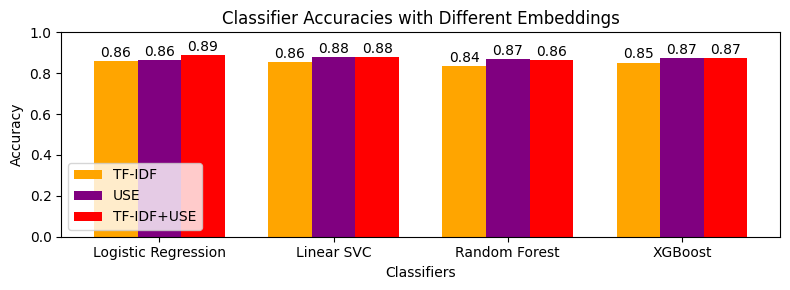

In [63]:
import matplotlib.pyplot as plt

classifiers = list(models.keys())
tfidf_values = list(tfidf_acc.values())
use_values = list(use_acc.values())
combined_values = list(combined_acc.values())

x = np.arange(len(classifiers))

bar_width = 0.25
plt.figure(figsize=(8, 3))
plt.bar(x - bar_width, tfidf_values, bar_width, label='TF-IDF', color='orange')
plt.bar(x, use_values, bar_width, label='USE', color='purple')
plt.bar(x + bar_width, combined_values, bar_width, label='TF-IDF+USE', color='red')

plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Classifier Accuracies with Different Embeddings')
plt.xticks(x, classifiers)
plt.ylim(0, 1.0)
plt.legend()

# Add accuracy values on top of the bars
for i in range(len(classifiers)):
    plt.text(x[i] - bar_width, tfidf_values[i] + 0.02, f"{tfidf_values[i]:.2f}", ha='center')
    plt.text(x[i], use_values[i] + 0.02, f"{use_values[i]:.2f}", ha='center')
    plt.text(x[i] + bar_width, combined_values[i] + 0.02, f"{combined_values[i]:.2f}", ha='center')


# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
# use_acc = use_acc.to_dict()
# combined_acc = combined_acc.to_dict()
# tdif_acc, use_acc, combined_acc = pd.DataFrame.from_dict(tfidf_acc, orient='index', columns=['Accuracy']), pd.DataFrame.from_dict(use_acc, orient='index', columns=['Accuracy']), pd.DataFrame.from_dict(combined_acc, orient='index', columns=['Accuracy'])
# results_df = pd.concat([tdif_acc, use_acc, combined_acc], axis=1)
# results_df.columns = ['TF-IDF Accuracy', 'USE Accuracy', 'Combined Accuracy']
# print("\nFinal Results:")
# print(results_df)


Final Results:
                     TF-IDF Accuracy  USE Accuracy  Combined Accuracy
Logistic Regression         0.859420      0.863768           0.886957
Linear SVC                  0.856522      0.879710           0.878261
Random Forest               0.836232      0.869565           0.862319
XGBoost                     0.852174      0.873913           0.873913


# DL